<a href="https://colab.research.google.com/github/yosaphatprs/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum Modul 12 - Face Detection Method**
## Nama: Josafat Pratama S.
## No  : 15
## NIM : 2141720031

## Tugas Praktikum

### **Soal No. 1**

In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Soal No. 2**

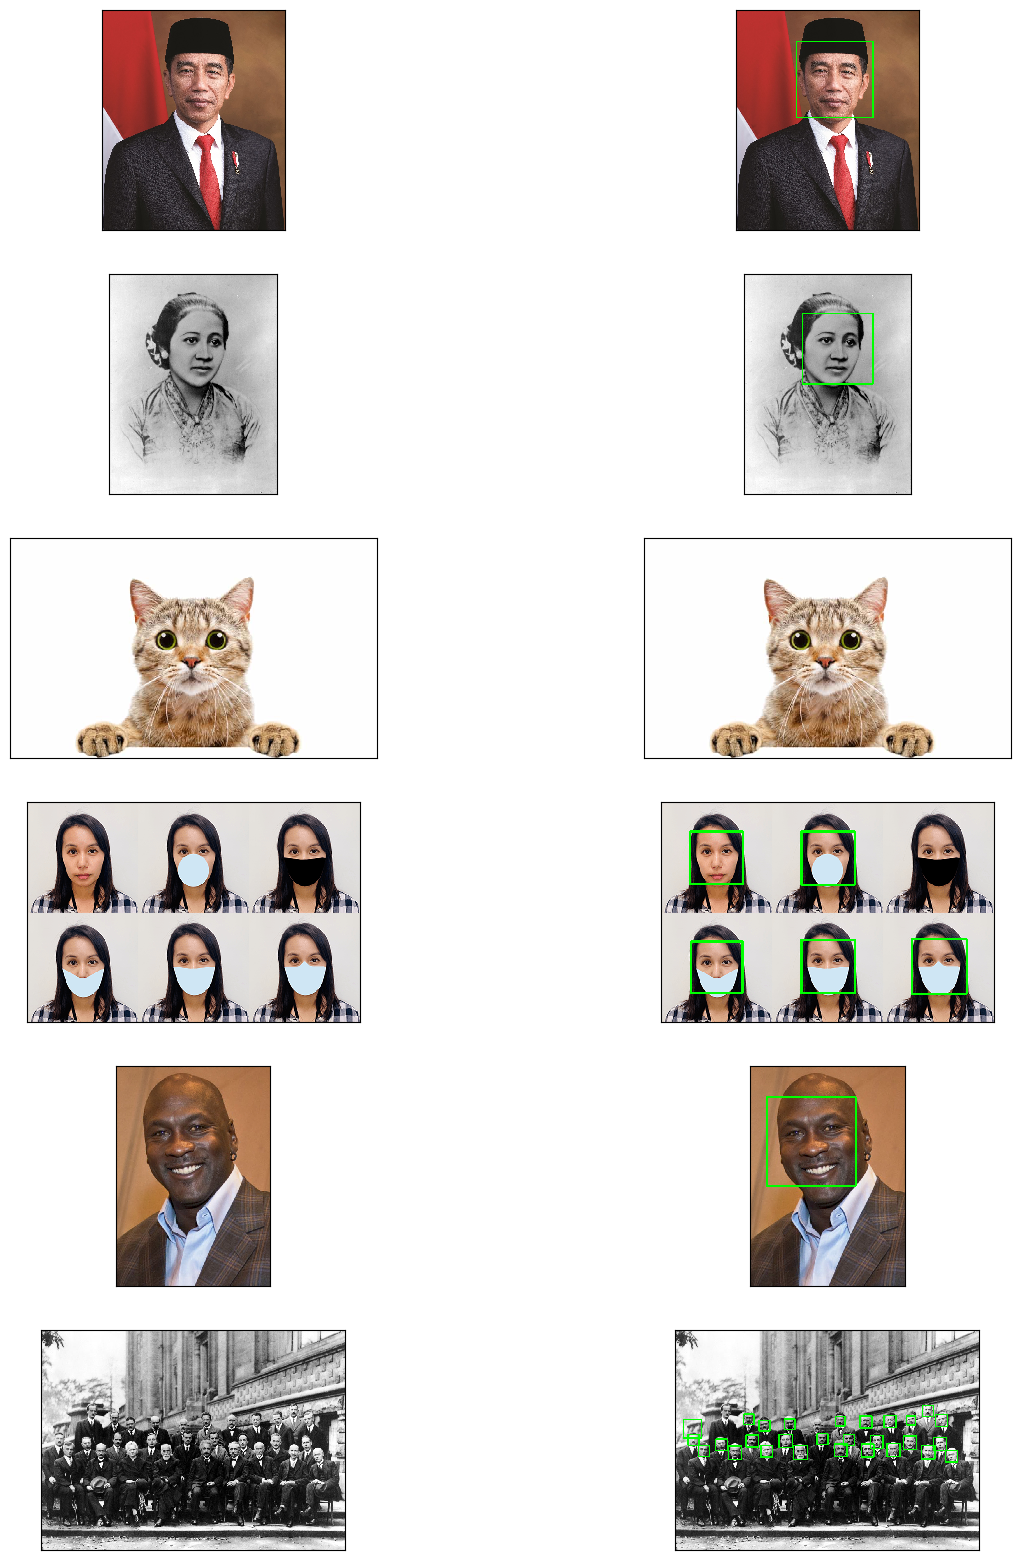

In [3]:
def deteksi_wajah(img, cascade):
  img_facedet = img.copy()
  roi = cascade.detectMultiScale(img_facedet)
  for(x,y,w,h) in roi:
    cv.rectangle(img_facedet,(x,y),(x+w,y+h),(0,255,0),3)
  img_facedet = cv.cvtColor(img_facedet, cv.COLOR_BGR2RGB)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  return img, img_facedet

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_TI/Images/haarcascades/haarcascade_frontalface_alt.xml')
jokowi = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/facedet/jokowi.jpg')
kartini = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/facedet/kartini.jpg')
kucing = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/facedet/kucing.jpg')
mask = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/facedet/mask.png')
mjordan = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/facedet/mjordan.jpg')
solvayconf = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/facedet/solvayconf.jpg')

# Deteksi Wajah
jokowi, jokowi_facedet = deteksi_wajah(jokowi, cascade_wajah)
kartini, kartini_facedet = deteksi_wajah(kartini, cascade_wajah)
kucing, kucing_facedet = deteksi_wajah(kucing, cascade_wajah)
mask, mask_facedet = deteksi_wajah(mask, cascade_wajah)
mjordan, mjordan_facedet = deteksi_wajah(mjordan, cascade_wajah)
solvayconf, solvayconf_facedet = deteksi_wajah(solvayconf, cascade_wajah)

images = [jokowi, jokowi_facedet, kartini, kartini_facedet, kucing, kucing_facedet, mask, mask_facedet, mjordan, mjordan_facedet, solvayconf, solvayconf_facedet]

plt.figure(figsize = (15,20))
for i in range(len(images)):
  plt.subplot(6,2,i+1),plt.imshow(images[i], interpolation='nearest')
  plt.xticks([]),plt.yticks([])
plt.show()

### **Soal No. 3**

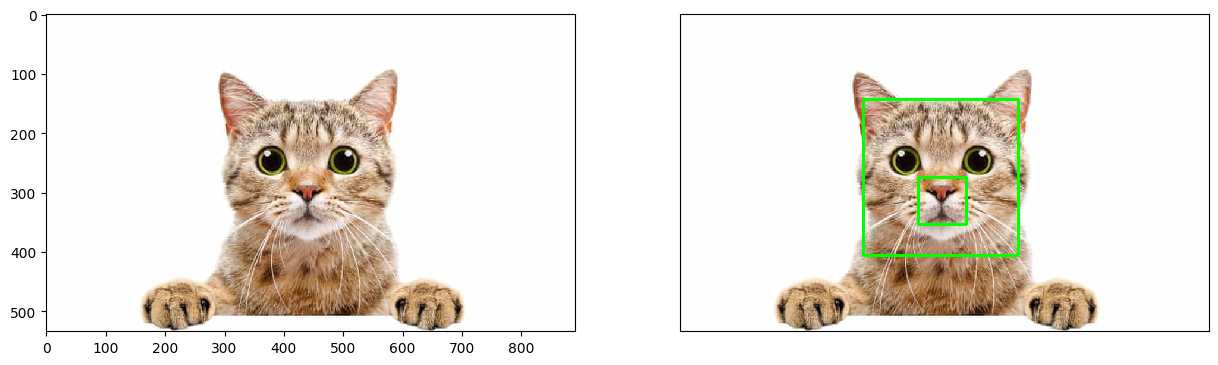

In [4]:
cascade_kucing = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_TI/Images/haarcascades/haarcascade_frontalcatface.xml')
kucing = cv.cvtColor(kucing, cv.COLOR_BGR2RGB)
kucing_facedet = kucing.copy()
kucing, kucing_facedet = deteksi_wajah(kucing, cascade_kucing)
plt.figure(figsize = (15,20))
plt.subplot(1,2, 1),plt.imshow(kucing, interpolation='nearest')
plt.subplot(1,2, 2),plt.imshow(kucing_facedet, interpolation='nearest')
plt.xticks([]),plt.yticks([])
plt.show()

### **Soal No. 4**

<ipython-input-5-7aaec6bb2f88>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2, 1),plt.imshow(jokowi, cmap='gray', interpolation='nearest')


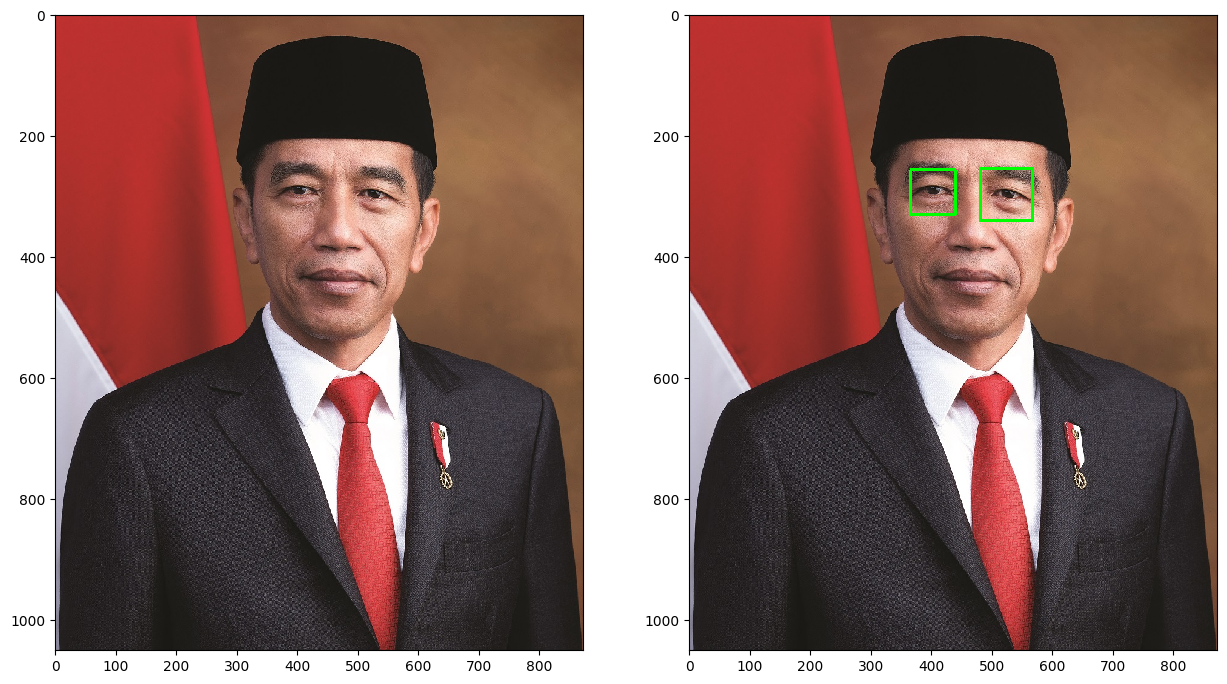

In [5]:
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_TI/Images/haarcascades/haarcascade_eye.xml')
jokowi = cv.cvtColor(jokowi, cv.COLOR_BGR2RGB)
jokowi_facedet = jokowi.copy()
jokowi, jokowi_facedet = deteksi_wajah(jokowi, cascade_mata)
plt.figure(figsize = (15,20))
plt.xticks([]),plt.yticks([])
plt.subplot(1,2, 1),plt.imshow(jokowi, cmap='gray', interpolation='nearest')
plt.subplot(1,2, 2),plt.imshow(jokowi_facedet, cmap='gray', interpolation='nearest')
plt.show()

### **Soal No. 5**

In [6]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import html
import time

In [7]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [8]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [9]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = cascade_wajah.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

### **Soal No. 6**

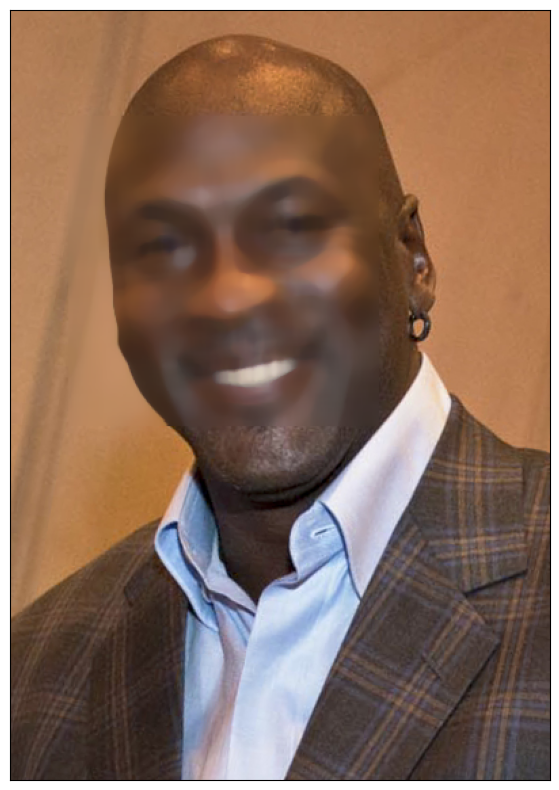

In [10]:
mjordan_copy = mjordan.copy()
mjordan_blur = mjordan.copy()
roi_wajah = cascade_wajah.detectMultiScale(mjordan)

for(x,y,w,h) in roi_wajah:
  mjordan_copy = mjordan_copy[y:y+h,x:x+w]
  blur_wajah = cv.medianBlur(mjordan_copy,15)
  mjordan_blur[y:y+h,x:x+w] = blur_wajah
plt.figure(figsize = (10,10))
plt.xticks([]),plt.yticks([])
plt.imshow(mjordan_blur, cmap='gray')

### **Soal No. 7**

### Anggota Kelompok
1. Dhoriffito Diansyah Putra (2141720201/11)
2. Josafat Pratama Susilo (2141720031/15)
3. Maidy Putri Joshi (2141720060/18)
4. Nasyawa Ramadhia K.S.E (2141720011/22)
5. Novita Dwi Rahmadani (2141720050/23)

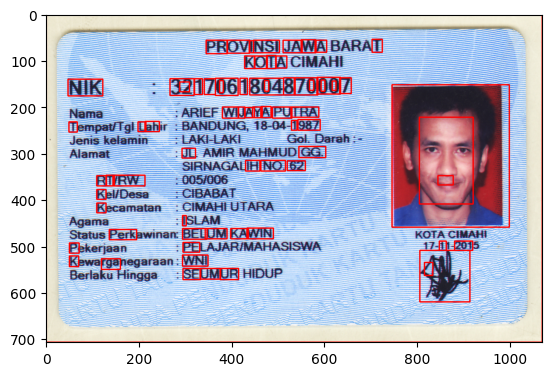

In [11]:
src = cv.imread('/content/drive/MyDrive/PCVK_TI/Images/KTP/ktp2.png')
blurred = src.copy()
gray = blurred.copy()

blurred = cv.GaussianBlur(src, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)

### **Soal No. 8**

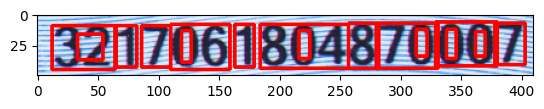

In [12]:
nik_ktp = ktp_rgb.copy()
nik_ktp = nik_ktp[130:180, 255:665]
plt.imshow(nik_ktp)

### **Soal No. 9**

In [13]:
import os
import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori data training
DATADIR = "/content/drive/MyDrive/PCVK_TI/Images/dataset/training"
dirs = []

training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
  dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
  path = os.path.join(DATADIR, char_name)
  class_number = dirs.index(char_name)
  for img in (os.listdir(path)):
    try:
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (width, height))
      training_data.append([new_array, class_number])
    except Exception as e:
      pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
  X.append(feature)
  Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

### **Soal 10**

In [15]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)

Y = to_categorical(Y, num_classes=None)
X = X / 255.0
width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)

fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, Y, epochs=20, verbose=1)

model.save('anpr.model')

Epoch 1/20


ValueError: ignored

### **Soal 11**

In [17]:
import os
import cv2
import tensorflow as tf
import numpy as np
data_dir_training = "dataset/training-bak"
data_dir_testing = "dataset/testing"
dirs = []
width, height = 100, 100
model = tf.keras.models.load_model("anpr.model")
for char_name in sorted(os.listdir(data_dir_training)):
 dirs.append(char_name)
for car in sorted(os.listdir(data_dir_testing)):
 temp = ""
 for char_img in sorted(os.listdir(os.path.join(data_dir_testing, car))):
  img_array = cv2.imread(os.path.join(data_dir_testing, car, char_img), cv2.IMREAD_ANYCOLOR)
  new_array = cv2.resize(img_array, (width, height))
  new_array = np.array(new_array).reshape(-1, width, height, 1)
  new_array = new_array / 255.0
  prediction = model.predict(new_array)
  temp += dirs[np.argmax(prediction[0])]
 print("folder name: {} no: {}".format(car, temp))

OSError: ignored